In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [18]:

# Загрузка данных из CSV-файлов
cars_df = pd.read_csv("C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.1/cars.csv")
operations_no_replace_df = pd.read_csv("C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.1/operations_no_replace.csv")
operations_with_replace_df = pd.read_csv("C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.1/operations_with_replace.csv")
receipts_no_replace_df = pd.read_csv("C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.1/receipts_no_replace.csv")
receipts_with_replace_df = pd.read_csv("C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.1/receipts_with_replace.csv")


In [19]:

# Объединение данных
merged_no_replace_df = pd.merge(receipts_no_replace_df, operations_no_replace_df, how="left", on="operation_number")
merged_with_replace_df = pd.merge(receipts_with_replace_df, operations_with_replace_df, how="left", on="operation_number")


In [20]:

# Общая сумма оплаты за все операции
total_payment = merged_no_replace_df['payment'].sum() + merged_with_replace_df['payment'].sum()


In [21]:

# Суммарные оплаты по каждой операции
total_payment_per_operation = pd.concat([merged_no_replace_df, merged_with_replace_df]) \
    .groupby('operation_number')['payment'].sum().reset_index()


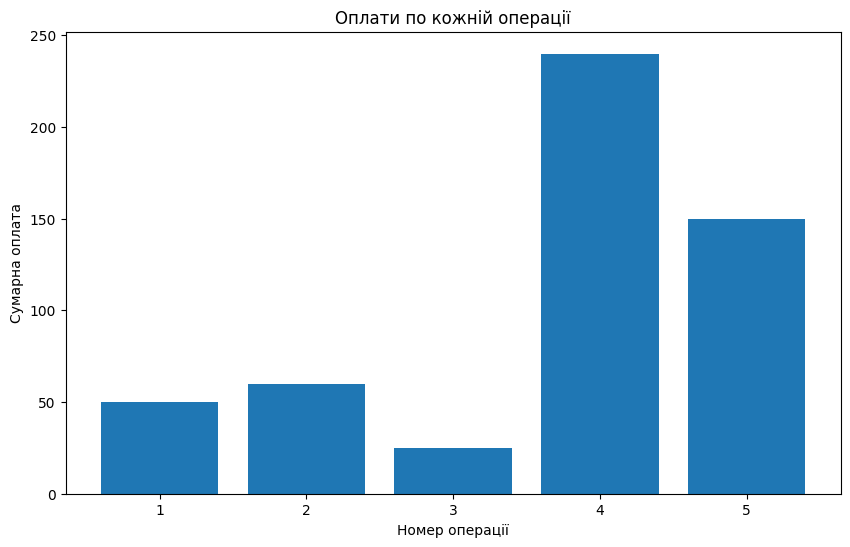

In [22]:

# (в) Диаграмма сумм в соответствии с предыдущим пунктом
plt.figure(figsize=(10, 6))
plt.bar(total_payment_per_operation['operation_number'], total_payment_per_operation['payment'])
plt.xlabel('Номер операції')
plt.ylabel('Сумарна оплата')
plt.title('Оплати по кожній операції')
plt.show()


In [23]:

# (г) Виджет для выбора операции из выпадающего списка
operation_options = total_payment_per_operation['operation_number'].unique()
operation_dropdown = widgets.Dropdown(options=operation_options, description='Оберіть номер операції:')
display(operation_dropdown)

Dropdown(description='Оберіть номер операції:', options=(1, 2, 3, 4, 5), value=1)

In [24]:
# Виджет для вывода результатов
output = widgets.Output()
display(output)

# Функция для отображения количества автомобилей для выбранной операции, разделенных по маркам
def display_cars_count(selected_operation):
    selected_operation = operation_dropdown.value
    cars_count_by_brand_no_replace = pd.merge(cars_df, receipts_no_replace_df[receipts_no_replace_df['operation_number'] == selected_operation], how='inner', on='car_number')['brand'].value_counts()
    cars_count_by_brand_with_replace = pd.merge(cars_df, receipts_with_replace_df[receipts_with_replace_df['operation_number'] == selected_operation], how='inner', on='car_number')['brand'].value_counts()

    # Объединяем результаты
    cars_count_by_brand = cars_count_by_brand_no_replace.add(cars_count_by_brand_with_replace, fill_value=0)
    
    with output:        
        output.clear_output()
        print(f"Кількість машин за маркою для яких виконувалась операція {selected_operation}:")
        display(pd.DataFrame(cars_count_by_brand.reset_index().rename(columns={'index': 'id', 'brand': 'Марка', 'count': 'Кількість'})).head())
   
# Привязываем функцию к изменению значения выпадающего списка
operation_dropdown.observe(display_cars_count, names='value')

Output()